# Traffic Accident Reconstruction

This is an exploration of the data collected in the AutoAuto Traffic Accident of October 11, 2019. [Video footage of the accident is available.](https://static.autoauto.ai/uploads/8aa0143927794cb1a20b4ebc27a79f0f.MOV)

This notebook will load the data and explore it through simple visualizations. The data will also be processed and transformed in order to visualize it in ways more natural to humans.

### Import Libraries

We'll use three libraries in this notebook:
- _Pandas_ for loading data and processing it as dataframes.
- _NumPy_ for doing numeric operations on our data.
- _Matplotlib_ for visualizing our data.

**Note:** Pandas and NumPy are traditionally imported as `pd` and `np` to shorten the names.

**Note:** The line `%matplotlib inline` tells Jupyter to show Matplotlib figures "inline" with the output of the notebook.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

### Load the Data

Each of the two cars saved a "black box" file of the accelerometer and gyroscope data during the accident. The code below loads these files as two Pandas dataframes, one dataframe for each souce file.

Each file contains 7 columns:
- **time**: a timestamp of when the data was collected
- **ax**: the accelerometer `x`-axis measurement (in $m/s^2$)
- **ay**: the accelerometer `y`-axis measurement (in $m/s^2$)
- **az**: the accelerometer `z`-axis measurement (in $m/s^2$)
- **gx**: the gyroscope `x`-axis measurement (in $\text{degrees}/\text{second}$)
- **gy**: the gyroscope `y`-axis measurement (in $\text{degrees}/\text{second}$)
- **gz**: the gyroscope `z`-axis measurement (in $\text{degrees}/\text{second}$)

In [2]:
car1 = pd.read_csv("black_box__2019-08-11_21-32-35.csv", parse_dates=['time']).set_index('time')
car2 = pd.read_csv("black_box__2019-08-11_21-32-36.csv", parse_dates=['time']).set_index('time')

In [3]:
# Sanity check the `car1` dataframe:
car1.head()

,gx,gy,gz,ax,ay,az
time,,,,,,
2019-08-11 21:32:35.965796,-0.068702,0.175573,0.091603,0.014160,-0.005859,0.989499
2019-08-11 21:32:36.004011,0.015267,0.053435,0.022901,0.012207,-0.000488,0.995847
2019-08-11 21:32:36.042141,-0.022901,0.190840,0.030534,0.013672,-0.008789,0.992917
2019-08-11 21:32:36.080023,0.152672,0.068702,-0.160305,0.012695,-0.006348,0.994138
2019-08-11 21:32:36.118227,0.053435,0.091603,0.106870,0.014893,-0.005371,0.993406


In [4]:
# Sanity check the `car2` dataframe:
car2.head()

,gx,gy,gz,ax,ay,az
time,,,,,,
2019-08-11 21:32:36.888706,0.053435,0.282443,0.045802,-0.021728,-0.019775,0.998288
2019-08-11 21:32:36.944113,0.076336,0.167939,-0.083969,-0.011963,-0.021484,0.998044
2019-08-11 21:32:36.982593,0.190840,0.137405,0.053435,-0.011475,-0.022461,0.990720
2019-08-11 21:32:37.020132,0.053435,0.106870,0.053435,-0.013916,-0.019775,0.988279
2019-08-11 21:32:37.057076,0.114504,0.022901,-0.022901,-0.020508,-0.027100,0.996579


### A note about Measurement Error

The accelerometer and gyroscrope sensors on the car are not perfect (no sensor is perfect), thus the measurements in these files will contain small amounts of _error_. As we go through the rest of this notebook, keep this in mind. Especially when we perform a cumulative sum of the data, this error will compound and we cannot expect a perfect representation of what happened. Nonetheless, it will be interesting, so buckle up!

### Visualize the Raw Data

The code below vizualizes the _raw_ measurements in the data. Each column is plotted in a single subplot with _both_ cars' data shown.

Sometimes the _raw_ data doesn't tell us much, but it's still good to visualize it in case we see anything jump out at us. In this case, we do see something! We can see spikes in many of the plots which seems to highlight the time of first impact between the cars, most visible in the `gz` plot!

/Users/ryan/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
/Users/ryan/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


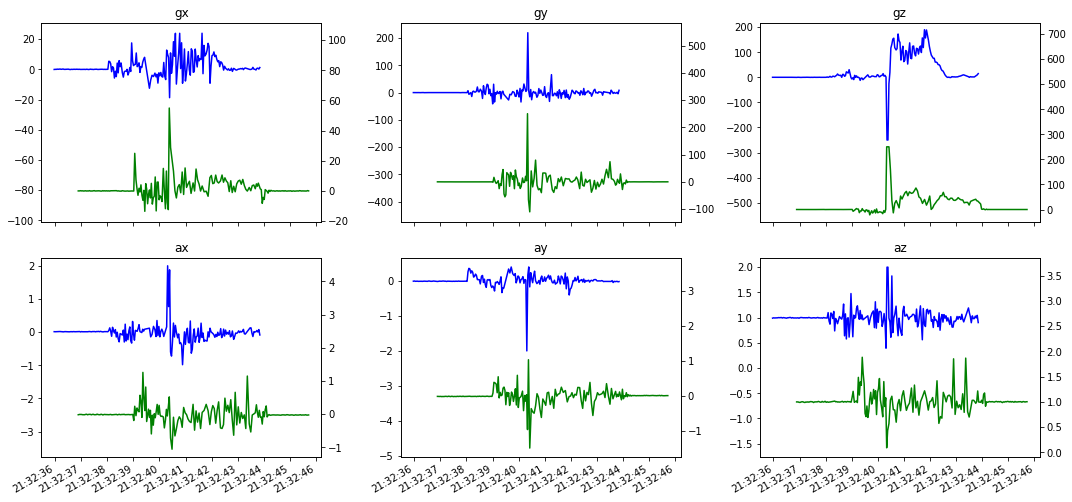

In [5]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

axes = axes.flatten()

padding = 0.1

for col, ax1 in zip(car1.columns.values, axes):
    ax2 = ax1.twinx()
    ax1.set_title(col)
    ax1.plot(car1[col], color='b')
    ax2.plot(car2[col], color='g')
    pad = np.ptp(car2[col]) * padding
    ax1.set_ylim(car1[col].min() - np.ptp(car2[col]) - 2*pad, car1[col].max() + pad)
    ax2.set_ylim(car2[col].min() - pad, car2[col].max() + np.ptp(car1[col]) + 2*pad)

fig.tight_layout()
fig.autofmt_xdate()

In our case, since we know the crash was between the vehicles which didn't flip over, and we know the orientation of the axes in the vehicles, we can reason that the `ax`, `ay` and `gz` values are most interesting. Let's plot those alone so we can see them more clearly.

**Note:** In the plots below, you can see how "noisy" the data are. This is partly due to the cars physically _moving_ (there are physical vibrations at play), and also the sensors not being perfect.

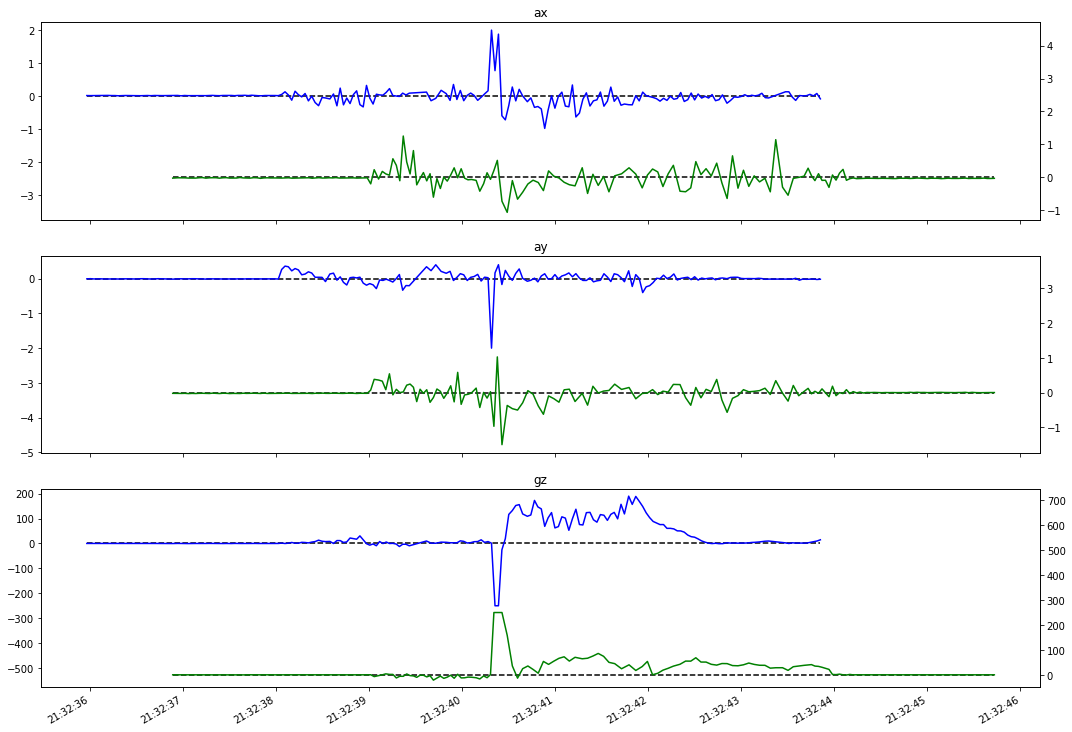

In [6]:
def plot_cars(car1, car2, columns):
    fig, axes = plt.subplots(len(columns), 1, figsize=(15, 12))

    axes = axes.flatten()

    padding = 0.1

    for col, ax1 in zip(columns, axes):
        ax2 = ax1.twinx()
        ax1.set_title(col)
        ax1.plot(car1[col], color='b')
        ax2.plot(car2[col], color='g')
        pad = np.ptp(car2[col]) * padding
        ax1.set_ylim(car1[col].min() - np.ptp(car2[col]) - 2*pad, car1[col].max() + pad)
        ax2.set_ylim(car2[col].min() - pad, car2[col].max() + np.ptp(car1[col]) + 2*pad)
        ax1.hlines(0.0, car1[col].index.min(), car1[col].index.max(), linestyles='dashed')
        ax2.hlines(0.0, car2[col].index.min(), car2[col].index.max(), linestyles='dashed')

    fig.tight_layout()
    fig.autofmt_xdate()

plot_cars(car1, car2, ['ax', 'ay', 'gz'])

### Process the Data

Now that we've visualized the raw data, let's process it so that we can interpret it better. This is always an important step when doing an analysis, but the _actual process_ changes dramatically depending on the domain you're working in. In our case, we need to think back to our physics and trigonometry classes!

What, really, physics and trigonometry?

Yes! The raw data is hard for us humans to understand because it's shown in $m/s^2$ (for the accelerometer values) and $\text{degrees}/\text{second}$ (for the gyroscope values). What is _easier_ for us humans to understand is:
1. _Where_ was the car _located_ at each point?
2. What _direction_ was the car facing at each point?

In [7]:
def compute_positions(car):
    """
    This function computes _positional_ data from the _raw_ data.
    
    Note: As we do cumulative sums (with the `.cumsum()` function) we'll
          be compounding error, thus the computed values will be "less
          reliable" the further into the path we go.
    """
    time_elapsed = car.index.to_series().diff().dt.total_seconds()

    def integrate_acceleration(acceleration):
        """
        Given the acceleration values (in m/s^2) we can first
        estimate the velocity of each car along the path (assuming
        they start at velocity=0), then we can estiamte the position
        of each car over time.
        """
        velocity = (acceleration * time_elapsed).cumsum()
        position = (velocity * time_elapsed).cumsum()
        return position

    position_x = integrate_acceleration(car.ax)
    position_y = integrate_acceleration(car.ay)
    position_z = integrate_acceleration(car.az)

    rotation_x = (car.gx * time_elapsed).cumsum()
    rotation_y = (car.gy * time_elapsed).cumsum()
    rotation_z = (car.gz * time_elapsed).cumsum()

    positions = pd.DataFrame({
        'x': position_x,
        'y': position_y,
        'z': position_z,
        'rx': rotation_x,
        'ry': rotation_y,
        'rz': rotation_z,
    }, index=car.index)

    return positions


car1_pos = compute_positions(car1)
car2_pos = compute_positions(car2)

We processed the data above, so now let's visualize it!

Let's start with the rotation values: **"What direction was the car facing at each point?"**

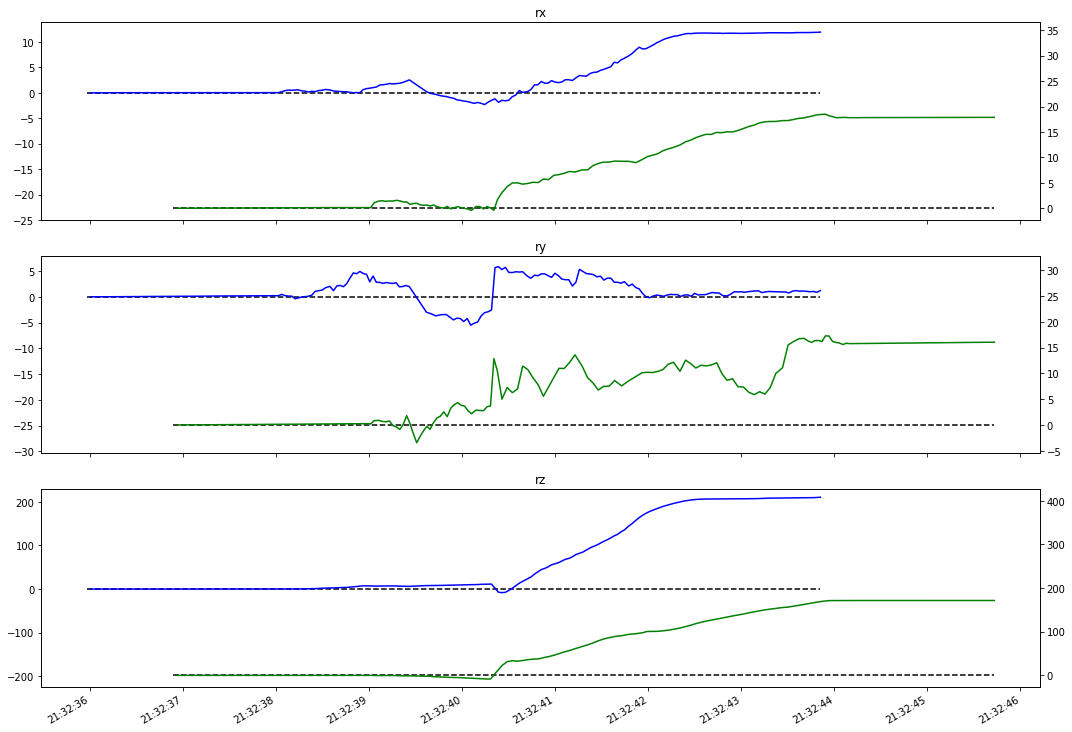

In [8]:
plot_cars(car1_pos, car2_pos, ['rx', 'ry', 'rz'])

**Conclusion:**

The car do not rotation significantly in the `x` and `y` axis. The small rotation we see in the `x` and `y` axis is probably due to compounding error (we've seen the crash footage, so we know that the cars didn't roll much in these axes).

However, there was significant rotation in the `z` axis (which we saw in the video footage as well). Looking at the `rz` plot above, match up the blue line to one of the cars in the video, and the green line to the other car. Which line is which car? There is a subtle point in the graph which will give it away!

### More Processing!

There is still more processing that can be done. Currently the `x` and `y` positions we calculated above are in the "frame of reference" of each car (the frame moves _with_ the car -- it is not _fixed_ from our point of view). We need to use the rotation of each car to compute the `x` and `y` positions of each car from a _fixed_ starting location, then we can visualize the car's path relative to where it _started_.

Moreover, we'll make a few assumptions for this (it is common that you have to make simplifying assumptions in your analysis). Here is what we'll assume:
- The cars stay flat on the ground and do not roll over, thus we can ignore the `rx`, `ry`, and `z` values altogether.
- Both cars start fully stopped (velocity is zero).

In our case, both assumptions above are okay because we've seen the crash footage and we've done some preliminary analysis on the rotation of the cars (above) and we didn't discover significate evidence of the cars "rolling over".

In [9]:
def compute_xy(car):
    """
    Convert to a fixed frame of reference based on where the car started.
    We use the `rz` value to tell use the rotation of the car relative to its
    starting location, and from that (and the xy relative motion of the car)
    we can estimate its fixed-frame position.
    """
    x_diff = car.x.diff()
    y_diff = car.y.diff()

    cos = np.cos(car.rz * np.pi / 180)
    sin = np.sin(car.rz * np.pi / 180)

    x = (y_diff * cos + x_diff * sin).cumsum()
    y = (y_diff * sin + x_diff * cos).cumsum()

    positions = pd.DataFrame({
        'x': x,
        'y': y,
    }, index=car.index)

    return positions


car1_xy_fixed = compute_xy(car1_pos)
car2_xy_fixed = compute_xy(car2_pos)

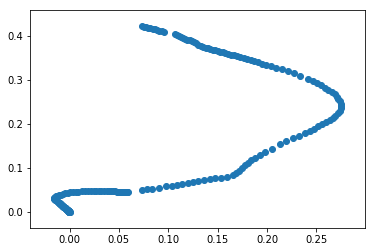

In [10]:
plt.scatter(car1_xy_fixed.x, car1_xy_fixed.y)

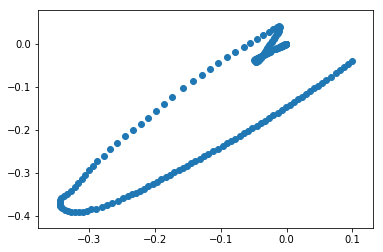

In [11]:
plt.scatter(car2_xy_fixed.x, car2_xy_fixed.y)

**Conclusion:**

We've been able to use Pandas and Matplotlib to process and visualize our data. We've seen how the data we collected captures the physical motion of the cars during the traffic accident. We've noted the assumptions we've made along the way and the error which is present in the measurements.